In [56]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


In [58]:
df=pd.read_csv('dowhy.csv',header=None)
col= ["treatment", "y_factual", "y_cfactual", "mu0", "mu1" ,]
for i in range(1,26):
    col.append("x" +str(i))
df.columns=col
df

,treatment,y_factual,y_cfactual,mu0,mu1,x1,x2,x3,x4,x5,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
0,1,5.599916,4.318780,3.268256,6.854457,-0.528603,-0.343455,1.128554,0.161703,-0.316603,...,1,1,1,1,0,0,0,0,0,0
1,0,6.875856,7.856495,6.636059,7.562718,-1.736945,-1.802002,0.383828,2.244320,-0.629189,...,1,1,1,1,0,0,0,0,0,0
2,0,2.996273,6.633952,1.570536,6.121617,-0.807451,-0.202946,-0.360898,-0.879606,0.808706,...,1,0,1,1,0,0,0,0,0,0
3,0,1.366206,5.697239,1.244738,5.889125,0.390083,0.596582,-1.850350,-0.879606,-0.004017,...,1,0,1,1,0,0,0,0,0,0
4,0,1.963538,6.202582,1.685048,6.191994,-1.045229,-0.602710,0.011465,0.161703,0.683672,...,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,0,4.091946,6.061976,3.986826,7.053195,-0.007654,-0.202946,-0.360898,0.161703,-0.316603,...,1,0,1,0,0,0,0,0,0,0
743,1,5.501677,4.237157,4.111877,7.084080,0.727295,-0.202946,-0.733261,-0.879606,0.808706,...,1,1,1,0,0,0,0,0,0,0
744,0,1.842583,4.949537,2.346736,6.523225,1.181234,0.196818,-1.477987,0.161703,0.746189,...,1,1,1,0,0,0,0,0,0,0
745,0,3.076368,7.554212,2.114661,6.419095,-0.288664,-0.202946,-1.477987,-0.879606,1.621430,...,1,1,1,0,0,0,0,0,0,0


array([[<Axes: title={'center': 'treatment'}>,
        <Axes: title={'center': 'y_factual'}>,
        <Axes: title={'center': 'y_cfactual'}>,
        <Axes: title={'center': 'mu0'}>, <Axes: title={'center': 'mu1'}>],
       [<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x2'}>,
        <Axes: title={'center': 'x3'}>, <Axes: title={'center': 'x4'}>,
        <Axes: title={'center': 'x5'}>],
       [<Axes: title={'center': 'x6'}>, <Axes: title={'center': 'x7'}>,
        <Axes: title={'center': 'x8'}>, <Axes: title={'center': 'x9'}>,
        <Axes: title={'center': 'x10'}>],
       [<Axes: title={'center': 'x11'}>, <Axes: title={'center': 'x12'}>,
        <Axes: title={'center': 'x13'}>, <Axes: title={'center': 'x14'}>,
        <Axes: title={'center': 'x15'}>],
       [<Axes: title={'center': 'x16'}>, <Axes: title={'center': 'x17'}>,
        <Axes: title={'center': 'x18'}>, <Axes: title={'center': 'x19'}>,
        <Axes: title={'center': 'x20'}>],
       [<Axes: title={'center': 

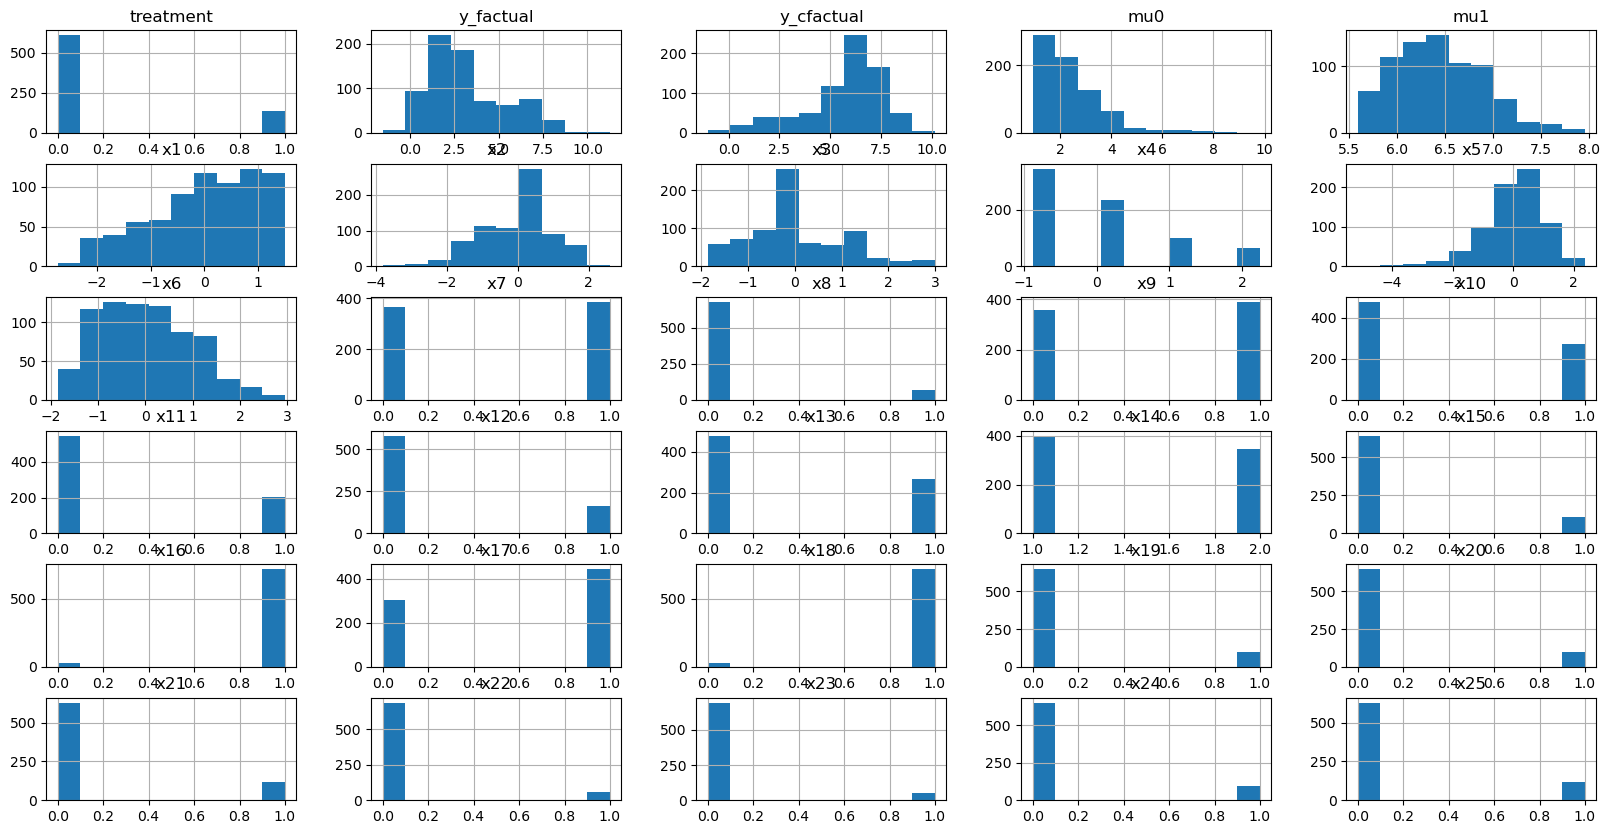

In [59]:
### Exploring all the attributes
df.hist(figsize=(20,10))

In [62]:
import dowhy
from dowhy import CausalModel
import dowhy.datasets, dowhy.plotter

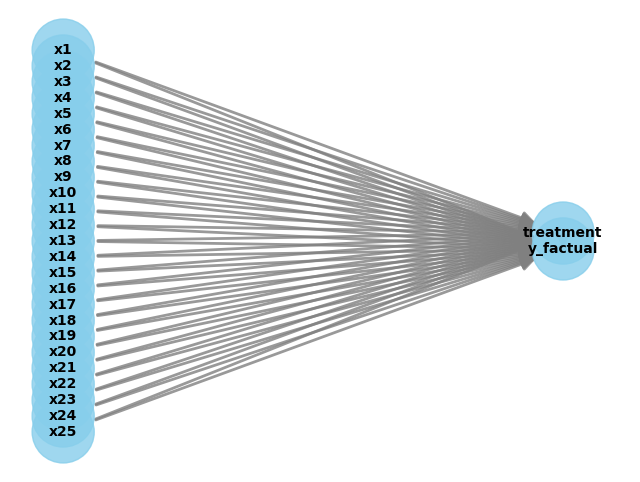

Estimating the effect using Propensity score matching *** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(E[y_factual|x16,x9,x10,x21,x11,x17,x6,x22,x3,x1,x13,x4,x20,x15,x1
d[treatment]                                                                  

                                       
2,x18,x24,x2,x7,x8,x5,x25,x14,x23,x19])
                                       
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→y_factual then P(y_factual|treatment,x16,x9,x10,x21,x11,x17,x6,x22,x3,x1,x13,x4,x20,x15,x12,x18,x24,x2,x7,x8,x5,x25,x14,x23,x19,U) = P(y_factual|treatment,x16,x9,x10,x21,x11,x17,x6,x22,x3,x1,x13,x4,x20,x15,x12,x18,x24,x2,x7,x8,x5,x25,x14,x23,x19)

## Realized estimand
b: y_factual~treatment+x16+x9+x10+x21+x11+x17+x6+x22+x3+x1+x13+x4+x20+x15+x12+x18+x24+x2+x7+x8+x5+

In [61]:
def causal_steps(df,lang):
    model=CausalModel(data=df,treatment='treatment',outcome='y_factual',common_causes=["x"+str(i)for i in range(1,26)])
    #model.summary()
    ### Visualizing the model causal variables
    model.view_model()
    #### Identify the effect using exhaustive search
    est_iden=model.identify_effect(proceed_when_unidentifiable=True,method_name='exhaustive-search')
    #print('Identifying the estimates',est_iden)
    def refutation_stage(iden, est):
            results=[]
            refute_methods=['data_subset_refuter','placebo_treatment_refuter','random_common_cause']
            for refuter in refute_methods:
                refute=model.refute_estimate(iden, est, method_name=refuter,fraction=0.8,placebo_type="permute")
                results.append(refute)
            r_count=1
            in_re=True
            if in_re is True:
                 for re in results:
                    print("Refutation", re)
                    r_count+=1

    if lang=='LR':
        #Estimate the causal parameters using linear regression,  propensity score matching
        e=model.estimate_effect(est_iden, method_name="backdoor.linear_regression",test_significance=True,target_units='ate')
        #dowhy.plotter.plot_causal_effect(e,df['y_factual'],df['treatment'])
        e.interpret()
        #print('Estimating the effect using Linear regression',e)
        ref1=refutation_stage(est_iden,e)


    elif lang=='PSM':
        est_p=model.estimate_effect(est_iden, method_name='backdoor.propensity_score_stratification')
        print('Estimating the effect using Propensity score matching',est_p)
        ref2=refutation_stage(est_iden, est_p)

ca=causal_steps(df,"PSM")    


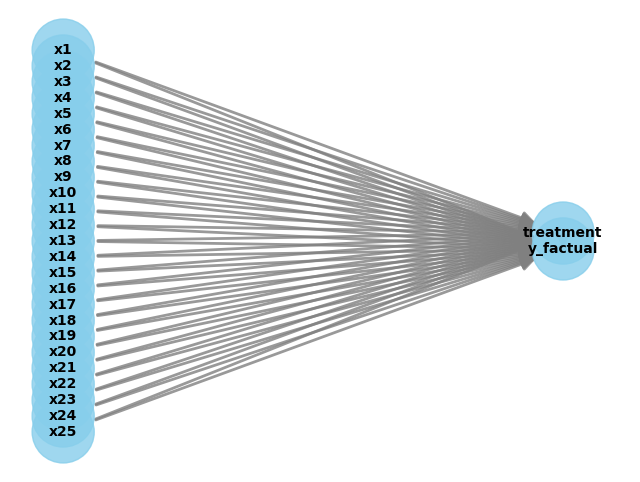

Estimating the effect using Propensity score matching *** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(E[y_factual|x16,x9,x10,x21,x11,x17,x6,x22,x3,x1,x13,x4,x20,x15,x1
d[treatment]                                                                  

                                       
2,x18,x24,x2,x7,x8,x5,x25,x14,x23,x19])
                                       
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→y_factual then P(y_factual|treatment,x16,x9,x10,x21,x11,x17,x6,x22,x3,x1,x13,x4,x20,x15,x12,x18,x24,x2,x7,x8,x5,x25,x14,x23,x19,U) = P(y_factual|treatment,x16,x9,x10,x21,x11,x17,x6,x22,x3,x1,x13,x4,x20,x15,x12,x18,x24,x2,x7,x8,x5,x25,x14,x23,x19)

## Realized estimand
b: y_factual~treatment+x16+x9+x10+x21+x11+x17+x6+x22+x3+x1+x13+x4+x20+x15+x12+x18+x24+x2+x7+x8+x5+

In [ ]:
ca1=causal_steps(df,'PSM')

In [ ]:
### References: The Effect: An Introduction to Research Design and Causality. 